#  Glasgow City Council 2007 Election


* The election data was originally provided by Jeffery O'Neill,  Open STV, www.OpenSTV.org, 2013.

* There are 11 candidate and 9560 voters. 
    
    1. Shaukat Butt ($B$)
    2. Michael Cobley ($C$) 
    3. Stephen Dornan ($D$)
    4. John Flanagan ($F$)
    5. Alan L Hughes ($H1$)
    6. Allison Hunter ($H2$)
    7. Will Jess ($J$)
    8. Irene Lang ($L$) 
    9. Patricia Mcintyre ($M1$)
    10. George Douglas Mcnee ($M2$)
    11. Carolina Perez ($P$)
  
* The election used STV for proportional representation.   However, in this notebook we are intrested in applying single-winner voting methods to the ranking data. 

* The processed rankings were downloaded from  [https://www.preflib.org/dataset/00008](https://www.preflib.org/dataset/00008).   The file contains incomplete total orders (a [toc file](https://www.preflib.org/format#types)). 

* There is a top cycle among Dornan, Flanagan and Hunter. 


In [1]:
from pref_voting.profiles_with_ties import *
from pref_voting.voting_methods import *
from preflibtools.instances import OrdinalInstance # use the preflibtools 


In [2]:

short_candname = {
    "Shaukat Butt": "B",
    "Michael Cobley": "C",
    "Stephen Dornan": "D",
    "John Flanagan": "F",
    "Alan L Hughes": "H1",
    "Allison Hunter": "H2",
    "Will Jess": "J",
    "Irene Lang": "L", 
    "Patricia Mcintyre": "M1",
    "George Douglas Mcnee": "M2",
    "Carolina Perez": "P",
}

# Use preflibtools to process the file.
instance = OrdinalInstance()
instance.parse_file("./edata/scottland_govan_2007/00008-00000009.toc")

rankings = list()
rcounts = list()
for o in instance.orders:
    order = o
    rank = dict()
    
    for r,cs in enumerate(o): 
        for c in cs: 
            rank[c] = r + 1
    rankings.append(rank)
    rcounts.append(instance.multiplicity[order])

cmap = dict()
for alt, alt_name in instance.alternatives_name.items():
    cmap[alt] = short_candname[alt_name]
    if alt_name == 'Bob Kiss': 
        rc_winner = alt
    
    

prof = ProfileWithTies(rankings, 
                       rcounts = rcounts, 
                       cmap=cmap,
                       candidates = list(cmap.keys()))

prof.report()
prof.display_rankings()

# Use the extended strict preference in which all ranked candidates are strictly preferred 
# to all unranked candidates 
prof.use_extended_strict_preference()



There are 11 candidates and 9560 rankings: 
        The number of empty rankings: 0
        The number of rankings with ties: 9149
        The number of linear orders: 411
        The number of truncated linear orders: 0
        The number of rankings with skipped ranks: 0
        
        
H2(B C D F H1 J L M1 M2 P) 982
F(B C D H1 H2 J L M1 M2 P) 466
B(C D F H1 H2 J L M1 M2 P) 369
DFB(C H1 H2 J L M1 M2 P) 338
BDF(C H1 H2 J L M1 M2 P) 335
D(B C F H1 H2 J L M1 M2 P) 333
FDB(C H1 H2 J L M1 M2 P) 308
DF(B C H1 H2 J L M1 M2 P) 172
FD(B C H1 H2 J L M1 M2 P) 144
M1(B C D F H1 H2 J L M2 P) 137
M2(B C D F H1 H2 J L M1 P) 124
H2J(B C D F H1 L M1 M2 P) 112
FBD(C H1 H2 J L M1 M2 P) 102
DBF(C H1 H2 J L M1 M2 P) 95
H2L(B C D F H1 J M1 M2 P) 94
L(B C D F H1 H2 J M1 M2 P) 92
J(B C D F H1 H2 L M1 M2 P) 66
BD(C F H1 H2 J L M1 M2 P) 64
H2D(B C F H1 J L M1 M2 P) 60
C(B D F H1 H2 J L M1 M2 P) 60
H2F(B C D H1 J L M1 M2 P) 49
BFD(C H1 H2 J L M1 M2 P) 45
M1H1(B C D F H2 J L M2 P) 41
H2DF(B C H1 J L M1 M2 P) 

H2LPJM2(B C D F H1 M1) 1
FDBH1M2(C H2 J L M1 P) 1
H2M2CM1F(B D H1 J L P) 1
DFCH1P(B H2 J L M1 M2) 1
BFDCJ(H1 H2 L M1 M2 P) 1
FDBLP(C H1 H2 J M1 M2) 1
H2CJFH1(B D L M1 M2 P) 1
FDBM1J(C H1 H2 L M2 P) 1
H2FDCJ(B H1 L M1 M2 P) 1
DBCFM1(H1 H2 J L M2 P) 1
H2LPM2J(B C D F H1 M1) 1
H2JCM2F(B D H1 L M1 P) 1
H2LFM2M1(B C D H1 J P) 1
FH2DBJ(C H1 L M1 M2 P) 1
JPLCH2(B D F H1 M1 M2) 1
M1M2BH2L(C D F H1 J P) 1
H1M1JCM2(B D F H2 L P) 1
BH2CDF(H1 J L M1 M2 P) 1
H1M1JH2C(B D F L M2 P) 1
FDJBC(H1 H2 L M1 M2 P) 1
H2DM1CJ(B F H1 L M2 P) 1
BFCLJ(D H1 H2 M1 M2 P) 1
H2JDBC(F H1 L M1 M2 P) 1
H2LJCP(B D F H1 M1 M2) 1
DBFH2L(C H1 J M1 M2 P) 1
CDFJB(H1 H2 L M1 M2 P) 1
FH2DBL(C H1 J M1 M2 P) 1
FDBH1M1(C H2 J L M2 P) 1
CJM2PL(B D F H1 H2 M1) 1
DH2FBJ(C H1 L M1 M2 P) 1
DFJM1M2(B C H1 H2 L P) 1
FDH2BJ(C H1 L M1 M2 P) 1
M2DM1FH1(B C H2 J L P) 1
BDFCH2(H1 J L M1 M2 P) 1
FLCJH2(B D H1 M1 M2 P) 1
H2JH1M1C(B D F L M2 P) 1
H2CM1M2J(B D F H1 L P) 1
FJPDC(B H1 H2 L M1 M2) 1
FH2JM2C(B D H1 L M1 P) 1
H2DBFC(H1 J L M1 M2 P) 1


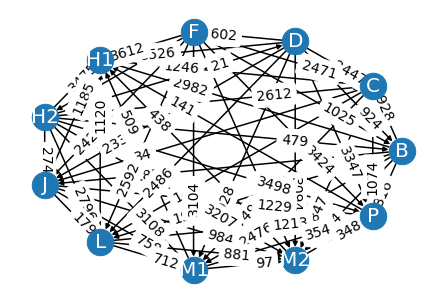

There is 1 cycle: 



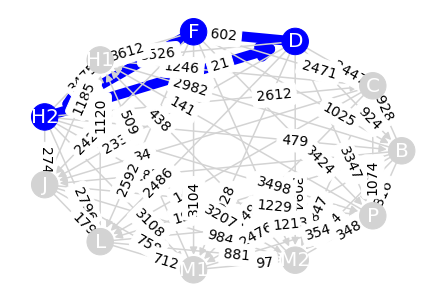

In [3]:
prof.display_margin_graph()

prof.margin_graph().display_cycles()


Smith Set winners are {D, F, H2}
Restrict to the Smith Set: 
H2(D F) 2521
F(D H2) 768
(D F H2) 1657
DFH2 1645
D(F H2) 681
FDH2 1051
H2DF 486
H2FD 381
DH2F 180
FH2D 190
There is 1 cycle: 



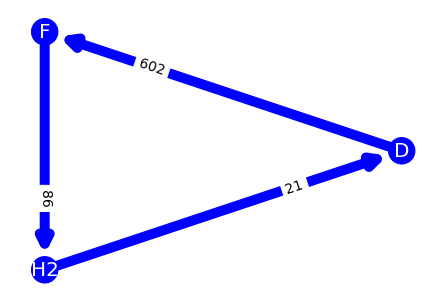

In [4]:
smith_set.display(prof)

print("Restrict to the Smith Set: ")
smith = smith_set(prof)

restricted_prof = prof.remove_candidates([c for c in prof.candidates if c not in smith])

restricted_prof.display_rankings()
restricted_prof.use_strict_preference()

restricted_prof.margin_graph().display_cycles()

In [5]:
def display_instant_runoff_results(prof): 
    
    rounds = list()
    
    remaining_candidates = prof.candidates
    
    while len(remaining_candidates) > 1: 
        reduced_prof = prof.remove_candidates([c for c in prof.candidates if c not in remaining_candidates])
        
        pl_scores = reduced_prof.plurality_scores_ignoring_overvotes()
        lowest_pl_score = min(pl_scores.values())
        cands_to_remove = [c for c in pl_scores.keys() if pl_scores[c] == lowest_pl_score]
        
        sorted_pl_scores = sorted(pl_scores.values(), reverse=True)
        sorted_cands = sorted(pl_scores.items(), reverse=True, key=lambda cpl: cpl[1])
        rounds.append('\n'.join([f"\t{prof.cmap[c]} plurality score: {pl_score}" for c, pl_score in sorted_cands]) + '\n' + f'\tThe candidate removed during this round: {reduced_prof.cmap[cands_to_remove[0]]}')
        remaining_candidates = [c for c in remaining_candidates if c not in cands_to_remove]
        
    for ridx, r in enumerate(rounds): 
        print(f"Instant Runoff round {ridx +1}")
        print(r)
        
    print(f"The winner is {prof.cmap[remaining_candidates[0]]}")
    


In [6]:
display_instant_runoff_results(prof)

Instant Runoff round 1
	H2 plurality score: 2694
	F plurality score: 1657
	D plurality score: 1590
	B plurality score: 1371
	M1 plurality score: 450
	L plurality score: 398
	C plurality score: 394
	J plurality score: 377
	M2 plurality score: 377
	H1 plurality score: 138
	P plurality score: 114
	The candidate removed during this round: P
Instant Runoff round 2
	H2 plurality score: 2714
	F plurality score: 1662
	D plurality score: 1594
	B plurality score: 1372
	M1 plurality score: 450
	L plurality score: 427
	C plurality score: 398
	J plurality score: 398
	M2 plurality score: 377
	H1 plurality score: 138
	The candidate removed during this round: H1
Instant Runoff round 3
	H2 plurality score: 2728
	F plurality score: 1669
	D plurality score: 1603
	B plurality score: 1374
	M1 plurality score: 495
	L plurality score: 434
	C plurality score: 408
	J plurality score: 406
	M2 plurality score: 384
	The candidate removed during this round: M2
Instant Runoff round 4
	H2 plurality score: 2759
	F pl

In [7]:

cw = prof.condorcet_winner()

if cw is None: 
    print("There is no Condorcet winner.")
else: 
    print(f"The Condorcet winner is {cmap[cw]}.")

split_cycle_faster.display(prof)
stable_voting.display(prof)
minimax.display(prof)
beat_path_faster.display(prof)
copeland.display(prof)

print()

cl = prof.condorcet_loser()

if cl is None: 
    print("There is no Condorcet loser.")
else: 
    print(f"The Condorcet loser is {cmap[cl]}.")

There is no Condorcet winner.
Split Cycle winner is {D}
Stable Voting winner is {D}
Minimax winner is {D}
Beat Path winner is {D}
Copeland winners are {D, F, H2}

The Condorcet loser is H1.


## Using the Support Graph

Interestingly, the results of the margin-based methods (except Stable Voting) depend on whether the *margin* or *support* is used to compare candidates.   The *support* of candidate $a$ over $b$ is the number of voters that rank $a$ strictly above $b$.  



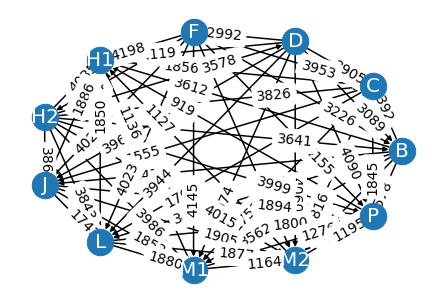

There is 1 cycle: 



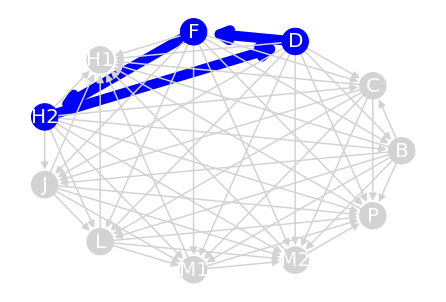

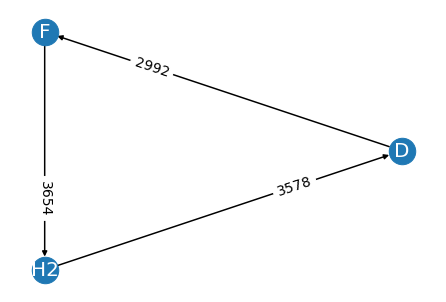

There is no Condorcet winner.
Split Cycle winner is {F}
Stable Voting winner is {D}
Minimax winner is {F}
Beat Path winner is {F}

The Condorcet loser is H1.


In [8]:
prof.display_support_graph()

sg = prof.support_graph()

sg.display_cycles()

smith = smith_set(sg)

restricted_sg = sg.remove_candidates([c for c in sg.candidates if c not in smith])

restricted_sg.display()


cw = prof.condorcet_winner()

if cw is None: 
    print("There is no Condorcet winner.")
else: 
    print(f"The Condorcet winner is {cmap[cw]}.")

split_cycle_faster.display(prof, strength_function=prof.support)
stable_voting.display(prof, strength_function=prof.support)
minimax.display(prof, strength_function=prof.support)
beat_path_faster.display(prof, strength_function=prof.support)

print()

cl = sg.condorcet_loser()

if cl is None: 
    print("There is no Condorcet loser.")
else: 
    print(f"The Condorcet loser is {cmap[cl]}.")
    
